In [68]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



%matplotlib inline 
# Import Library to remove warnings
import warnings
warnings.filterwarnings('ignore')

# To avoid SSL warning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [69]:
# load dataset 
titanic=sns.load_dataset('titanic')

In [70]:
# Print first 10 rows of data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [71]:
# count the number of rows and columns in the dataset
titanic.shape

(891, 15)

In [72]:
# get some statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
# get a count of number of survived
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

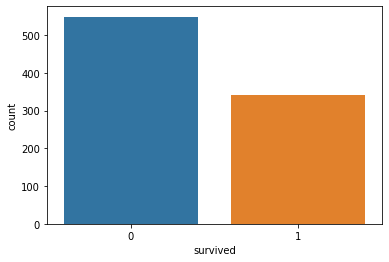

In [74]:
# visualize count 
sns.countplot(titanic['survived'])

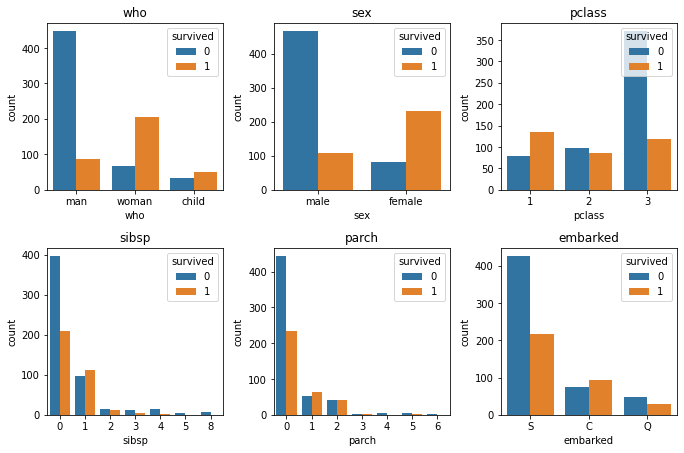

In [75]:
# Vizualize the count of survivors for the columns below
cols=['who','sex','pclass','sibsp','parch','embarked']
n_rows=2
n_cols=3

# Get figure and axis for each subplot

fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        #index to go through no. of columns
        
        i=r*n_cols+c
        # show where to position each subplot
        ax= axs[r][c]
        sns.countplot(titanic[cols[i]],hue=titanic['survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc='upper right')
        
plt.tight_layout()

In [76]:
# look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [77]:
# look at sex and class in accordance to survial rate
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

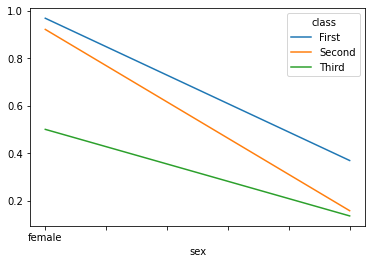

In [78]:
# Visual reprentation of sex and class in accordance to survial rate
titanic.pivot_table('survived',index='sex',columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

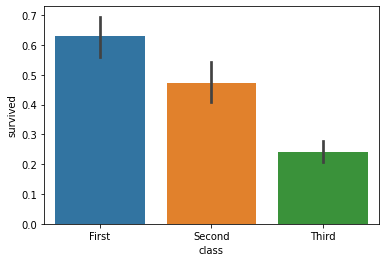

In [79]:
# Plot the survival rate of each class
sns.barplot(x='class',y='survived',data=titanic)

In [80]:
# Check for sum of null rows for each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [81]:

for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [82]:
# Drop columns as they are redundant and ain't numerical
titanic=titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis=1)

# remove the rows with missing values
titanic=titanic.dropna( subset=['embarked','age'])

In [83]:
# Count the new number of rows and columns in the dataset
titanic.shape

(712, 8)

In [84]:
# look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [85]:
# Print unique values in dataset 
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [86]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

# Encode the sex and embarked column
titanic.iloc[:,2]=LE.fit_transform(titanic.iloc[:,2].values)

titanic.iloc[:,7]=LE.fit_transform(titanic.iloc[:,7].values)


In [87]:
# Print unique values in dataset 
print(titanic['sex'].unique())
print(titanic['embarked'].unique())
# 1 = "male" / 0 ="Female"

[1 0]
[2 0 1]


In [88]:
# # Applying onehotencoder to embarked column
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False)
# onehot_data = pd.DataFrame(encoder.fit_transform(titanic['embarked'].values.reshape(-1,1)))
# onehot_data.columns = encoder.get_feature_names_out(['embarked'])
# titanic = pd.concat([titanic,onehot_data],ignore_index=False,axis=1)
# titanic.head()

In [89]:
# look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [90]:
# Drop column embarked as it is an object and we have applied OntHotEncoder
# titanic=titanic.drop(['embarked'],axis=1)

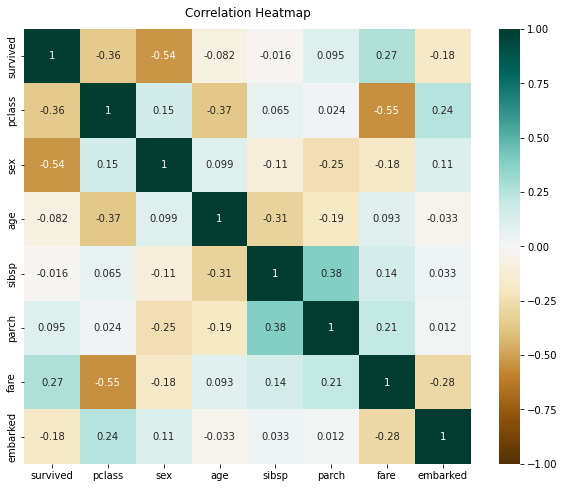

In [91]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(titanic.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [92]:
titanic.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,1.595506
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.779038
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [93]:
#split the data into dependent and independent values
#for independent values we can select age, pclass and sex as they are correlated to the dependent varible.

X=titanic.iloc[:,[1,2,3]].values
y=titanic.iloc[:,0].values

# split the data into test and training : 80-20 split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)



In [94]:
# Create a function with ML models
def models(X_train,Y_train):
    # USing logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    # USing Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=2,metric='hamming',p=2)
    knn.fit(X_train,Y_train)
    
    # Using SVC ( RBF kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='rbf',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    # Using SVC ( linear kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='linear',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree= DecisionTreeClassifier(criterion="gini", random_state=0)
    tree.fit(X_train,Y_train)
    
    # Use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest= RandomForestClassifier(n_estimators=50,criterion="gini", random_state=0)
    forest.fit(X_train,Y_train)
    
    # Print training accuracy
    print('[0] Logistic Regression Training Accuracy:',round(log.score(X_train,Y_train)*100,2),"%")
    print('[1] KNN Training Accuracy:',round(knn.score(X_train,Y_train)*100,2),"%")
    print('[2] SUV  Training Accuracy (Linear kernel):',round(svc_lin.score(X_train,Y_train)*100,2),"%")
    print('[3] SUV  Training Accuracy (RBF kernel):',round(svc_rbf.score(X_train,Y_train)*100,2),"%")
    print('[4] Decision Tree Accuracy:',round(tree.score(X_train,Y_train)*100,2),"%")
    print('[5] Random Forest Accuracy:',round(forest.score(X_train,Y_train)*100,2),"%")
    
    
    
    
    return log, knn, svc_lin,svc_rbf,tree,forest

In [95]:
# Printing model accuracy for train data
model=models(X_train,Y_train)

[0] Logistic Regression Training Accuracy: 78.03 %
[1] KNN Training Accuracy: 85.76 %
[2] SUV  Training Accuracy (Linear kernel): 62.57 %
[3] SUV  Training Accuracy (RBF kernel): 77.68 %
[4] Decision Tree Accuracy: 89.28 %
[5] Random Forest Accuracy: 88.93 %


In [96]:
# Show confusion matrix and accuracy for all models on test data
from sklearn.metrics import confusion_matrix
j=0
# iterating for the len of models to get confusion matrix for each model with acurracy as per test data
for i in range(len(model)):
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
    
    # Extract True negative( TN), False positive(FP), False Negative(FN), True Positive ( TP)
    
   
    TN, FP, FN, TP = confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
    
    test_score = (TP+TN)/(TN+FP+FN+TP)
    
    
    print(cm)
    Model_names=["Logistic Regression","KNN", "SUV(linear)","SUV(RBF)","Decision Tree", "Random Forrest"]
    
    print('Model [{}] Testing Accuracy ="{}"'.format(Model_names[j], round(test_score*100,2)),"%")
    j+=1
    print()
    

[[73  9]
 [15 46]]
Model [Logistic Regression] Testing Accuracy ="83.22" %

[[69 13]
 [20 41]]
Model [KNN] Testing Accuracy ="76.92" %

[[79  3]
 [53  8]]
Model [SUV(linear)] Testing Accuracy ="60.84" %

[[70 12]
 [18 43]]
Model [SUV(RBF)] Testing Accuracy ="79.02" %

[[77  5]
 [16 45]]
Model [Decision Tree] Testing Accuracy ="85.31" %

[[74  8]
 [12 49]]
Model [Random Forrest] Testing Accuracy ="86.01" %



In [97]:
from sklearn import metrics as  m
print("Performance of Decision Tree on Titanic Dataset\n\n",m.classification_report(Y_test, model[4].predict(X_test)))
print()
print()
print("Performance of Random Forrest on Titanic Dataset\n\n",m.classification_report(Y_test, model[5].predict(X_test)))


Performance of Decision Tree on Titanic Dataset

               precision    recall  f1-score   support

           0       0.83      0.94      0.88        82
           1       0.90      0.74      0.81        61

    accuracy                           0.85       143
   macro avg       0.86      0.84      0.85       143
weighted avg       0.86      0.85      0.85       143



Performance of Random Forrest on Titanic Dataset

               precision    recall  f1-score   support

           0       0.86      0.90      0.88        82
           1       0.86      0.80      0.83        61

    accuracy                           0.86       143
   macro avg       0.86      0.85      0.86       143
weighted avg       0.86      0.86      0.86       143



# After cleaning the data and selecting the right features for the test we can get an accuracy between 85% to 86 % with <u>Decision Tree</u> and <u>Random Forrest</u> 